# Create color stimuli

By default, `stimupy` creates grayscale stimuli with intensity values between 0 and 1. `stimupy` is primarily focused on stimulus **geometry** - the shapes, patterns, and spatial arrangements that define visual stimuli. While you can create color stimuli by specifying RGB values directly, proper color specification is a complex topic involving color spaces, calibration, and perceptual considerations that are better handled by specialized color science libraries.

This guide shows you basic approaches to adding color to `stimupy` stimuli, but for rigorous color work, consider using dedicated color libraries like `colorspacious`, `colour-science`, or `colorspace`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from stimupy.components import shapes
from stimupy.stimuli import checkerboards
from stimupy.utils import plot_stim

## Method 1: Create RGB arrays directly

**When to use:** When you need basic color specification with known RGB values.

**Steps:**
1. Create your grayscale stimulus
2. Convert to RGB by expanding dimensions
3. Assign specific RGB color values to different regions

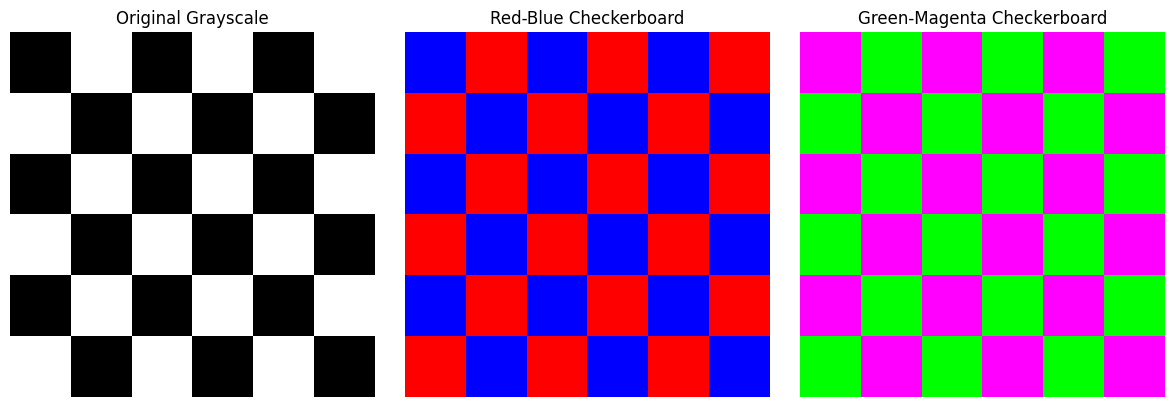

In [2]:
# Step 1: Create base stimulus
checkerboard = checkerboards.checkerboard(visual_size=(6, 6), ppd=20, 
                                         check_visual_size=1, 
                                         intensity_checks=(0, 1))

# Step 2: Create RGB version
height, width = checkerboard["img"].shape
rgb_img = np.zeros((height, width, 3))

# Step 3: Assign colors based on checkerboard pattern
# White squares -> Red
# Black squares -> Blue
mask = checkerboard["img"] > 0.5
rgb_img[mask] = [1, 0, 0]      # Red for white squares
rgb_img[~mask] = [0, 0, 1]     # Blue for black squares

# Display
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(checkerboard["img"], cmap="gray")
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(rgb_img)
plt.title("Red-Blue Checkerboard")
plt.axis('off')

plt.subplot(1, 3, 3)
# Alternative: Green-Magenta
rgb_img2 = np.zeros((height, width, 3))
rgb_img2[mask] = [0, 1, 0]     # Green
rgb_img2[~mask] = [1, 0, 1]    # Magenta
plt.imshow(rgb_img2)
plt.title("Green-Magenta Checkerboard")
plt.axis('off')

plt.tight_layout()
plt.show()

## Method 2: Use masks for multi-color stimuli

**When to use:** When you have complex stimuli with multiple regions that need different colors.

**Steps:**
1. Create stimulus with mask
2. Create RGB array
3. Use mask to assign different colors to each region

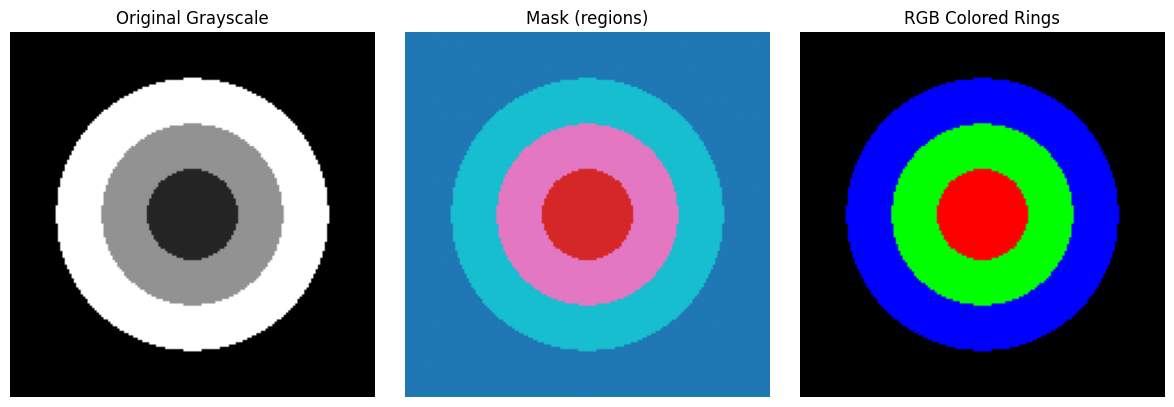

In [3]:
# Step 1: Create stimulus with multiple regions
from stimupy.components.radials import rings

ring_stim = rings(visual_size=(8, 8), ppd=20,
                  radii=(1, 2, 3),
                  intensity_rings=(0.2, 0.5, 0.8),
                  intensity_background=0.1)

# Step 2: Create RGB array
height, width = ring_stim["img"].shape
rgb_rings = np.zeros((height, width, 3))

# Step 3: Assign different colors to each ring
mask = ring_stim["ring_mask"]

# Background (mask == 0) -> Black
rgb_rings[mask == 0] = [0, 0, 0]
# Ring 1 (mask == 1) -> Red
rgb_rings[mask == 1] = [1, 0, 0]
# Ring 2 (mask == 2) -> Green  
rgb_rings[mask == 2] = [0, 1, 0]
# Ring 3 (mask == 3) -> Blue
rgb_rings[mask == 3] = [0, 0, 1]

# Display
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(ring_stim["img"], cmap="gray")
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ring_stim["ring_mask"], cmap="tab10")
plt.title("Mask (regions)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rgb_rings)
plt.title("RGB Colored Rings")
plt.axis('off')

plt.tight_layout()
plt.show()

## Method 3: Color stimuli with transparency

**When to use:** When you need to overlay colored stimuli or create transparent effects.

**Steps:**
1. Create RGBA array (Red, Green, Blue, Alpha)
2. Set alpha channel based on stimulus properties
3. Use for overlays or transparent effects

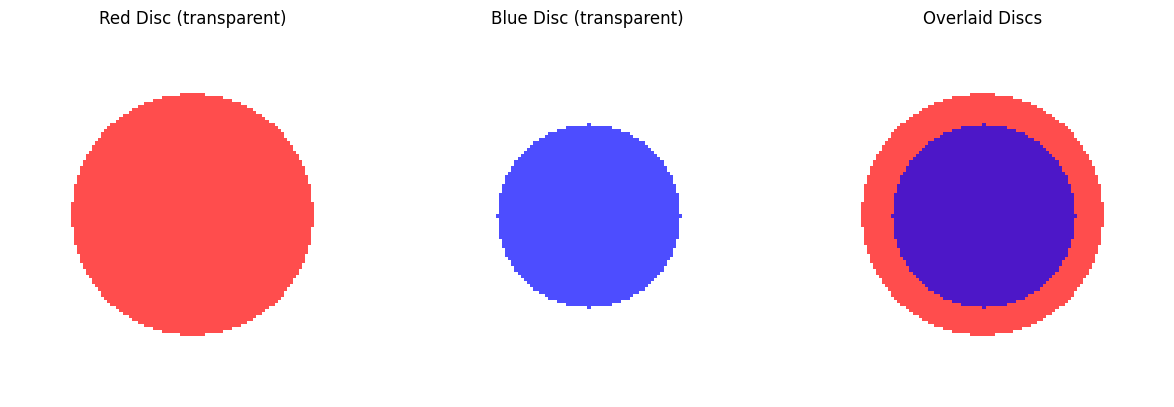

In [4]:
# Step 1: Create base stimuli
disc1 = shapes.disc(visual_size=(6, 6), ppd=20, radius=2, 
                    intensity_disc=1, intensity_background=0)

disc2 = shapes.disc(visual_size=(6, 6), ppd=20, radius=1.5, 
                    intensity_disc=1, intensity_background=0,
                    origin="center")

# Step 2: Create RGBA arrays
rgba1 = np.zeros((*disc1["img"].shape, 4))
rgba2 = np.zeros((*disc2["img"].shape, 4))

# Red disc with transparency
mask1 = disc1["ring_mask"] == 1
rgba1[mask1] = [1, 0, 0, 0.7]  # Semi-transparent red

# Blue disc with transparency  
mask2 = disc2["ring_mask"] == 1
rgba2[mask2] = [0, 0, 1, 0.7]  # Semi-transparent blue

# Step 3: Display overlays
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(rgba1)
plt.title("Red Disc (transparent)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(rgba2)
plt.title("Blue Disc (transparent)")
plt.axis('off')

plt.subplot(1, 3, 3)
# Overlay both discs
plt.imshow(rgba1)
plt.imshow(rgba2)
plt.title("Overlaid Discs")
plt.axis('off')

plt.tight_layout()
plt.show()

## Method 4: Using color space conversions

**When to use:** When you need to work with specific color spaces or chromaticity coordinates.

**Important:** This example uses matplotlib's HSV implementation, but for rigorous color science work, use dedicated libraries like `colorspacious`, `colour-science`, or `colorspace` that provide proper chromaticity-to-RGB conversions, color space transformations, and color appearance models.

**Steps:**
1. Create stimulus geometry
2. Use a color library to convert from desired color space to RGB
3. Apply the RGB values to your stimulus

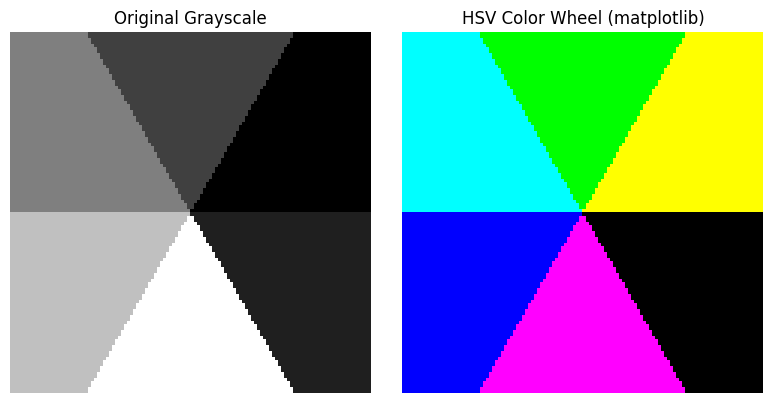

In [5]:
from matplotlib.colors import hsv_to_rgb

# Step 1: Create angular segments with different hues
from stimupy.components.angulars import segments

segment_stim = segments(visual_size=(6, 6), ppd=20,
                       angles=(0, 60, 120, 180, 240, 300, 360),
                       intensity_segments=(0.2, 0.4, 0.6, 0.8, 1.0, 0.3),
                       intensity_background=0.1)

# Step 2: Create HSV array (basic matplotlib conversion)
height, width = segment_stim["img"].shape
hsv_img = np.zeros((height, width, 3))

# Assign different hues to each segment
mask = segment_stim["segment_mask"]
for i in range(1, 7):  # 6 segments
    segment_mask = mask == i
    hue = (i - 1) / 6  # Hue from 0 to 1
    hsv_img[segment_mask] = [hue, 1, 1]  # Full saturation and brightness

# Step 3: Convert to RGB using matplotlib (basic conversion)
rgb_img = hsv_to_rgb(hsv_img)

# Display
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(segment_stim["img"], cmap="gray")
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rgb_img)
plt.title("HSV Color Wheel (matplotlib)")
plt.axis('off')

plt.tight_layout()
plt.show()

## Specifying chromaticities

```{admonition} Note
`stimupy` focuses on geometry, not color science.
```

**Workflow for specifying chromaticies of stimupy stimuli:**
1. **Geometry specification**: Use `stimupy` to create the geometric stimulus structure
2. **Chromaticity specification**: Determine chromaticity coordinates (xy, Lab, etc.) that you want the stimulus/different regions to have
3. **Convert to RGB using dedicated color science libraries**
    - e.g., `colorspacious`, `colour-science`, or `colorspace` for proper color space conversions
    - **Monitor calibration**: The conversion of RGB <-> chromaticity is different for different monitors, depends heavily on monitor calibration and viewing conditions
4. **Apply RGB values** to the stimulus using the methods above
5. **Validate colors** with calibrated equipment

## Color specification reference

**Basic RGB values** (for display on typical monitors):
- Red: `[1, 0, 0]`
- Green: `[0, 1, 0]`
- Blue: `[0, 0, 1]`
- Yellow: `[1, 1, 0]`
- Cyan: `[0, 1, 1]`
- Magenta: `[1, 0, 1]`
- White: `[1, 1, 1]`
- Black: `[0, 0, 0]`

**RGBA values:** Same as RGB plus alpha (transparency)
- Semi-transparent red: `[1, 0, 0, 0.5]`

## Choosing the right method

| Method | Best for | Pros | Cons |
|--------|----------|------|------|
| RGB arrays | Basic color specification | Simple, direct control | No color science validation |
| Mask-based | Multi-region stimuli | Clean separation, reusable | Requires planning |
| RGBA/transparency | Overlays, complex compositions | Advanced effects | More complex |
| Color space conversion | Scientific color work | Proper color science | Requires additional libraries |

**For experimental work:** Combine `stimupy` for geometry with dedicated color science libraries for proper chromaticity specification.